In [1]:
import tensorflow as tf
#for gpu in tf.config.list_physical_devices("GPU")

In [2]:
#pip install tensorflow

In [3]:
#sess =  tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14430188418448232090
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10116333568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7380555991683003859
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:15:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [5]:
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


In [6]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [7]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)


In [8]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [9]:
#def testLoader(img_dir, img_list, batch_size):

    #L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    #while True:

        #batch_start = 0
        #batch_end = batch_size

        #while batch_start < L:
            #limit = min(batch_end, L)
                       
            #X = load_img(img_dir, img_list[batch_start:limit])
            #Y = load_img(mask_dir, mask_list[batch_start:limit])

            #yield (X,Y) #a tuple with two numpy arrays with batch_size samples     
            #yield(X)
            #batch_start += batch_size   
            #batch_end += batch_size

In [41]:
from matplotlib import pyplot as plt
import random

train_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/images/"
train_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

In [17]:
test_img.shape

(128, 128, 128, 3)

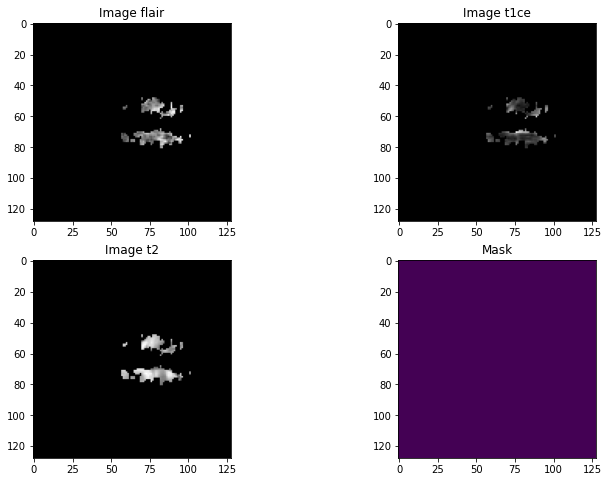

In [40]:
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [12]:
# @author: Sreenivas Bhattiprolu
# Code to train batches of cropped BraTS 2020 images using 3D U-net.

In [51]:
import keras

In [52]:
import os
import numpy as np
#from custom_datagen import imageLoader
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random


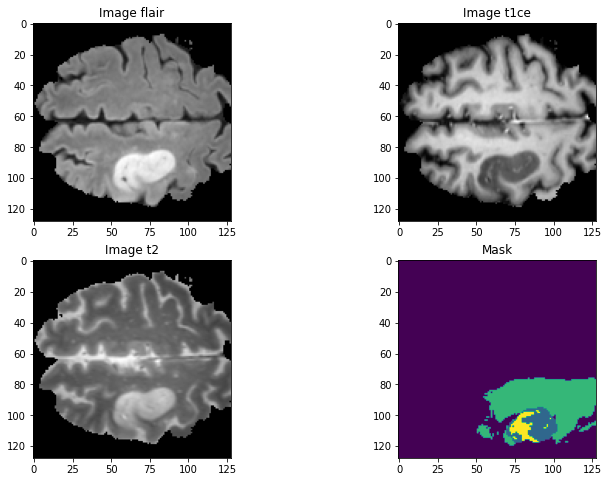

In [57]:
train_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/images/"
train_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [127]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [128]:
import pandas as pd
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/*.npy'))
for img in range(len(train_mask_list)):
    #print(img)
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)
    #pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],ignore_index=True)
    #df = pd.concat(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4

In [59]:
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

In [60]:
print(wt0, wt1, wt2, wt3)

0.26 22.53 22.53 26.21


In [61]:
train_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/images/"
train_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/"

val_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/val/images/"
val_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [62]:
batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,val_mask_dir, val_mask_list,  batch_size)

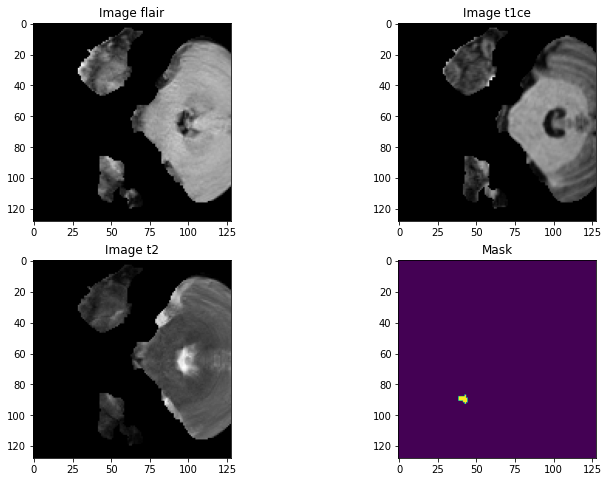

In [63]:
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [64]:
test_img.shape

(128, 128, 128, 3)

In [65]:
import keras

In [66]:
#!pip3 install -U segmentation-models-3D

In [67]:
#keras_applications.__version__
#keras_preprocessing.__version__


In [68]:
import tensorflow as tf
#from tensorflow import keras
#import tensorflow.keras.backend
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [69]:
from tensorflow import keras
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
from tensorflow.keras.optimizers import Adam
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

#metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]
metrics = ['accuracy', sm.metrics.IOUScore]

LR = 0.0001
#optim = keras.optimizers.Adam(LR)
optim = Adam(learning_rate=0.001, decay=1e-6)

Segmentation Models: using `tf.keras` framework.


In [106]:
import segmentation_models_3D as sm

In [110]:
model5 = sm.Unet('resnet34',classes=4, input_shape=(128, 128, 128, 3), encoder_weights=None)

In [70]:
import sys
sys.executable

'/usr/bin/python3'

In [78]:
import tensorflow as tf
from tensorflow import keras 

In [79]:
#pip install tf-nightly

In [80]:
from tensorflow.keras.models import Sequential
from keras.models import Sequential
tf.compat.v1.enable_eager_execution()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [81]:
from keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
#from keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' 
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [111]:
print(model5.summary())
print(model5.input_shape)
print(model5.output_shape)

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 bn_data (BatchNormalization)   (None, 128, 128, 12  9           ['data[0][0]']                   
                                8, 3)                                                             
                                                                                                  
 zero_padding3d_87 (ZeroPadding  (None, 134, 134, 13  0          ['bn_data[0][0]']                
 3D)                            4, 3)                                                      

                                                                                                  
 stage1_unit3_bn1 (BatchNormali  (None, 32, 32, 32,   256        ['add_49[0][0]']                 
 zation)                        64)                                                               
                                                                                                  
 stage1_unit3_relu1 (Activation  (None, 32, 32, 32,   0          ['stage1_unit3_bn1[0][0]']       
 )                              64)                                                               
                                                                                                  
 zero_padding3d_93 (ZeroPadding  (None, 34, 34, 34,   0          ['stage1_unit3_relu1[0][0]']     
 3D)                            64)                                                               
                                                                                                  
 stage1_un

                                128)                              'add_51[0][0]']                 
                                                                                                  
 stage2_unit3_bn1 (BatchNormali  (None, 16, 16, 16,   512        ['add_52[0][0]']                 
 zation)                        128)                                                              
                                                                                                  
 stage2_unit3_relu1 (Activation  (None, 16, 16, 16,   0          ['stage2_unit3_bn1[0][0]']       
 )                              128)                                                              
                                                                                                  
 zero_padding3d_99 (ZeroPadding  (None, 18, 18, 18,   0          ['stage2_unit3_relu1[0][0]']     
 3D)                            128)                                                              
          

 add_55 (Add)                   (None, 8, 8, 8, 256  0           ['stage3_unit1_conv2[0][0]',     
                                )                                 'stage3_unit1_sc[0][0]']        
                                                                                                  
 stage3_unit2_bn1 (BatchNormali  (None, 8, 8, 8, 256  1024       ['add_55[0][0]']                 
 zation)                        )                                                                 
                                                                                                  
 stage3_unit2_relu1 (Activation  (None, 8, 8, 8, 256  0          ['stage3_unit2_bn1[0][0]']       
 )                              )                                                                 
                                                                                                  
 zero_padding3d_105 (ZeroPaddin  (None, 10, 10, 10,   0          ['stage3_unit2_relu1[0][0]']     
 g3D)     

                                                                                                  
 stage3_unit5_bn1 (BatchNormali  (None, 8, 8, 8, 256  1024       ['add_58[0][0]']                 
 zation)                        )                                                                 
                                                                                                  
 stage3_unit5_relu1 (Activation  (None, 8, 8, 8, 256  0          ['stage3_unit5_bn1[0][0]']       
 )                              )                                                                 
                                                                                                  
 zero_padding3d_111 (ZeroPaddin  (None, 10, 10, 10,   0          ['stage3_unit5_relu1[0][0]']     
 g3D)                           256)                                                              
                                                                                                  
 stage3_un

                                )                                 'stage4_unit1_sc[0][0]']        
                                                                                                  
 stage4_unit2_bn1 (BatchNormali  (None, 4, 4, 4, 512  2048       ['add_61[0][0]']                 
 zation)                        )                                                                 
                                                                                                  
 stage4_unit2_relu1 (Activation  (None, 4, 4, 4, 512  0          ['stage4_unit2_bn1[0][0]']       
 )                              )                                                                 
                                                                                                  
 zero_padding3d_117 (ZeroPaddin  (None, 6, 6, 6, 512  0          ['stage4_unit2_relu1[0][0]']     
 g3D)                           )                                                                 
          

                                                                                                  
 decoder_stage0b_relu (Activati  (None, 8, 8, 8, 256  0          ['decoder_stage0b_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 decoder_stage1_upsampling (UpS  (None, 16, 16, 16,   0          ['decoder_stage0b_relu[0][0]']   
 ampling3D)                     256)                                                              
                                                                                                  
 decoder_stage1_concat (Concate  (None, 16, 16, 16,   0          ['decoder_stage1_upsampling[0][0]
 nate)                          384)                             ',                               
                                                                  'stage3_unit1_relu1[0][0]']     
          

                                8, 16)                           ']                               
                                                                                                  
 decoder_stage4a_bn (BatchNorma  (None, 128, 128, 12  64         ['decoder_stage4a_conv[0][0]']   
 lization)                      8, 16)                                                            
                                                                                                  
 decoder_stage4a_relu (Activati  (None, 128, 128, 12  0          ['decoder_stage4a_bn[0][0]']     
 on)                            8, 16)                                                            
                                                                                                  
 decoder_stage4b_conv (Conv3D)  (None, 128, 128, 12  6912        ['decoder_stage4a_relu[0][0]']   
                                8, 16)                                                            
          

In [113]:
model5.compile(optimizer = 'adam', loss=total_loss, metrics=metrics)

In [114]:
history=model5.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/100
258/258 [==============================] - 133s 492ms/step - loss: 0.9306 - accuracy: 0.8470 - iou_score: 0.2594 - val_loss: 0.9297 - val_accuracy: 0.7520 - val_iou_score: 0.2593
Epoch 2/100
258/258 [==============================] - 130s 503ms/step - loss: 0.9281 - accuracy: 0.9491 - iou_score: 0.2646 - val_loss: 0.9277 - val_accuracy: 0.9498 - val_iou_score: 0.2655
Epoch 3/100
258/258 [==============================] - 131s 508ms/step - loss: 0.9276 - accuracy: 0.9520 - iou_score: 0.2669 - val_loss: 0.9276 - val_accuracy: 0.9341 - val_iou_score: 0.2647
Epoch 4/100
258/258 [==============================] - 131s 507ms/step - loss: 0.9273 - accuracy: 0.9520 - iou_score: 0.2682 - val_loss: 0.9276 - val_accuracy: 0.9503 - val_iou_score: 0.2676
Epoch 5/100
258/258 [==============================] - 131s 506ms/step - loss: 0.9269 - accuracy: 0.9520 - iou_score: 0.2701 - val_loss: 0.9271 - val_accuracy: 0.9503 - val_iou_score: 0.2697
Epoch 6/100
258/258 [========================

Epoch 44/100
258/258 [==============================] - 132s 511ms/step - loss: 0.9151 - accuracy: 0.9505 - iou_score: 0.3099 - val_loss: 0.9322 - val_accuracy: 0.9497 - val_iou_score: 0.2684
Epoch 45/100
258/258 [==============================] - 132s 512ms/step - loss: 0.9143 - accuracy: 0.9506 - iou_score: 0.3137 - val_loss: 0.9307 - val_accuracy: 0.9471 - val_iou_score: 0.2698
Epoch 46/100
258/258 [==============================] - 132s 512ms/step - loss: 0.9110 - accuracy: 0.9505 - iou_score: 0.3234 - val_loss: 0.9341 - val_accuracy: 0.9458 - val_iou_score: 0.2632
Epoch 47/100
258/258 [==============================] - 132s 512ms/step - loss: 0.9083 - accuracy: 0.9496 - iou_score: 0.3300 - val_loss: 0.9334 - val_accuracy: 0.9459 - val_iou_score: 0.2648
Epoch 48/100
258/258 [==============================] - 132s 511ms/step - loss: 0.9084 - accuracy: 0.9490 - iou_score: 0.3312 - val_loss: 0.9378 - val_accuracy: 0.9461 - val_iou_score: 0.2641
Epoch 49/100
258/258 [==================

Epoch 87/100
258/258 [==============================] - 132s 512ms/step - loss: 0.8499 - accuracy: 0.9520 - iou_score: 0.5061 - val_loss: 0.9686 - val_accuracy: 0.9503 - val_iou_score: 0.2590
Epoch 88/100
258/258 [==============================] - 132s 513ms/step - loss: 0.8481 - accuracy: 0.9520 - iou_score: 0.5122 - val_loss: 0.9715 - val_accuracy: 0.9503 - val_iou_score: 0.2619
Epoch 89/100
258/258 [==============================] - 132s 512ms/step - loss: 0.8463 - accuracy: 0.9520 - iou_score: 0.5185 - val_loss: 0.9677 - val_accuracy: 0.9503 - val_iou_score: 0.2627
Epoch 90/100
258/258 [==============================] - 132s 512ms/step - loss: 0.8465 - accuracy: 0.9520 - iou_score: 0.5183 - val_loss: 0.9711 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 91/100
258/258 [==============================] - 132s 511ms/step - loss: 0.8459 - accuracy: 0.9520 - iou_score: 0.5207 - val_loss: 0.9714 - val_accuracy: 0.9503 - val_iou_score: 0.2543
Epoch 92/100
258/258 [==================

In [115]:
history=model5.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=500,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8408 - accuracy: 0.9520 - iou_score: 0.5404 - val_loss: 0.9741 - val_accuracy: 0.9503 - val_iou_score: 0.2560
Epoch 2/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8402 - accuracy: 0.9520 - iou_score: 0.5419 - val_loss: 0.9724 - val_accuracy: 0.9503 - val_iou_score: 0.2559
Epoch 3/500
258/258 [==============================] - 132s 513ms/step - loss: 0.8389 - accuracy: 0.9520 - iou_score: 0.5469 - val_loss: 0.9738 - val_accuracy: 0.9503 - val_iou_score: 0.2562
Epoch 4/500
258/258 [==============================] - 132s 514ms/step - loss: 0.8373 - accuracy: 0.9520 - iou_score: 0.5532 - val_loss: 0.9734 - val_accuracy: 0.9503 - val_iou_score: 0.2537
Epoch 5/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8368 - accuracy: 0.9520 - iou_score: 0.5550 - val_loss: 0.9767 - val_accuracy: 0.9503 - val_iou_score: 0.2509
Epoch 6/500
258/258 [========================

Epoch 44/500
258/258 [==============================] - 132s 514ms/step - loss: 0.8218 - accuracy: 0.9794 - iou_score: 0.6203 - val_loss: 0.9787 - val_accuracy: 0.9462 - val_iou_score: 0.2523
Epoch 45/500
258/258 [==============================] - 133s 515ms/step - loss: 0.8219 - accuracy: 0.9795 - iou_score: 0.6198 - val_loss: 0.9760 - val_accuracy: 0.9449 - val_iou_score: 0.2503
Epoch 46/500
258/258 [==============================] - 132s 513ms/step - loss: 0.8222 - accuracy: 0.9796 - iou_score: 0.6182 - val_loss: 0.9764 - val_accuracy: 0.9469 - val_iou_score: 0.2523
Epoch 47/500
258/258 [==============================] - 132s 513ms/step - loss: 0.8219 - accuracy: 0.9793 - iou_score: 0.6193 - val_loss: 0.9790 - val_accuracy: 0.9479 - val_iou_score: 0.2525
Epoch 48/500
258/258 [==============================] - 132s 514ms/step - loss: 0.8202 - accuracy: 0.9805 - iou_score: 0.6266 - val_loss: 0.9798 - val_accuracy: 0.9472 - val_iou_score: 0.2492
Epoch 49/500
258/258 [==================

Epoch 87/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8109 - accuracy: 0.9842 - iou_score: 0.6680 - val_loss: 0.9805 - val_accuracy: 0.9482 - val_iou_score: 0.2577
Epoch 88/500
258/258 [==============================] - 132s 514ms/step - loss: 0.8103 - accuracy: 0.9846 - iou_score: 0.6706 - val_loss: 0.9802 - val_accuracy: 0.9477 - val_iou_score: 0.2551
Epoch 89/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8116 - accuracy: 0.9841 - iou_score: 0.6661 - val_loss: 0.9792 - val_accuracy: 0.9472 - val_iou_score: 0.2523
Epoch 90/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8109 - accuracy: 0.9844 - iou_score: 0.6681 - val_loss: 0.9801 - val_accuracy: 0.9463 - val_iou_score: 0.2495
Epoch 91/500
258/258 [==============================] - 132s 511ms/step - loss: 0.8115 - accuracy: 0.9839 - iou_score: 0.6653 - val_loss: 0.9809 - val_accuracy: 0.9467 - val_iou_score: 0.2518
Epoch 92/500
258/258 [==================

258/258 [==============================] - 132s 512ms/step - loss: 0.8057 - accuracy: 0.9860 - iou_score: 0.6914 - val_loss: 0.9792 - val_accuracy: 0.9460 - val_iou_score: 0.2550
Epoch 130/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8049 - accuracy: 0.9862 - iou_score: 0.6948 - val_loss: 0.9808 - val_accuracy: 0.9459 - val_iou_score: 0.2550
Epoch 131/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8048 - accuracy: 0.9863 - iou_score: 0.6959 - val_loss: 0.9832 - val_accuracy: 0.9485 - val_iou_score: 0.2549
Epoch 132/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8049 - accuracy: 0.9862 - iou_score: 0.6952 - val_loss: 0.9825 - val_accuracy: 0.9485 - val_iou_score: 0.2552
Epoch 133/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8058 - accuracy: 0.9860 - iou_score: 0.6904 - val_loss: 0.9823 - val_accuracy: 0.9481 - val_iou_score: 0.2550
Epoch 134/500
258/258 [==========================

258/258 [==============================] - 132s 513ms/step - loss: 0.8018 - accuracy: 0.9874 - iou_score: 0.7112 - val_loss: 0.9824 - val_accuracy: 0.9486 - val_iou_score: 0.2520
Epoch 172/500
258/258 [==============================] - 132s 511ms/step - loss: 0.8013 - accuracy: 0.9874 - iou_score: 0.7124 - val_loss: 0.9807 - val_accuracy: 0.9485 - val_iou_score: 0.2552
Epoch 173/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8010 - accuracy: 0.9874 - iou_score: 0.7122 - val_loss: 0.9810 - val_accuracy: 0.9464 - val_iou_score: 0.2494
Epoch 174/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8012 - accuracy: 0.9874 - iou_score: 0.7116 - val_loss: 0.9802 - val_accuracy: 0.9448 - val_iou_score: 0.2496
Epoch 175/500
258/258 [==============================] - 132s 512ms/step - loss: 0.8014 - accuracy: 0.9873 - iou_score: 0.7104 - val_loss: 0.9807 - val_accuracy: 0.9449 - val_iou_score: 0.2493
Epoch 176/500
258/258 [==========================

258/258 [==============================] - 132s 513ms/step - loss: 0.7977 - accuracy: 0.9886 - iou_score: 0.7313 - val_loss: 0.9829 - val_accuracy: 0.9454 - val_iou_score: 0.2492
Epoch 214/500
258/258 [==============================] - 132s 513ms/step - loss: 0.7978 - accuracy: 0.9884 - iou_score: 0.7273 - val_loss: 0.9826 - val_accuracy: 0.9481 - val_iou_score: 0.2493
Epoch 215/500
258/258 [==============================] - 132s 512ms/step - loss: 0.7983 - accuracy: 0.9884 - iou_score: 0.7266 - val_loss: 0.9821 - val_accuracy: 0.9478 - val_iou_score: 0.2522
Epoch 216/500
258/258 [==============================] - 132s 510ms/step - loss: 0.7986 - accuracy: 0.9883 - iou_score: 0.7247 - val_loss: 0.9821 - val_accuracy: 0.9467 - val_iou_score: 0.2497
Epoch 217/500
258/258 [==============================] - 132s 513ms/step - loss: 0.7978 - accuracy: 0.9885 - iou_score: 0.7280 - val_loss: 0.9813 - val_accuracy: 0.9461 - val_iou_score: 0.2520
Epoch 218/500
258/258 [==========================

258/258 [==============================] - 132s 512ms/step - loss: 0.7953 - accuracy: 0.9893 - iou_score: 0.7429 - val_loss: 0.9839 - val_accuracy: 0.9478 - val_iou_score: 0.2520
Epoch 256/500
258/258 [==============================] - 132s 512ms/step - loss: 0.7953 - accuracy: 0.9893 - iou_score: 0.7427 - val_loss: 0.9835 - val_accuracy: 0.9470 - val_iou_score: 0.2463
Epoch 257/500
258/258 [==============================] - 132s 513ms/step - loss: 0.7951 - accuracy: 0.9893 - iou_score: 0.7437 - val_loss: 0.9828 - val_accuracy: 0.9447 - val_iou_score: 0.2464
Epoch 258/500
258/258 [==============================] - 132s 512ms/step - loss: 0.7951 - accuracy: 0.9893 - iou_score: 0.7445 - val_loss: 0.9834 - val_accuracy: 0.9457 - val_iou_score: 0.2461
Epoch 259/500
258/258 [==============================] - 132s 513ms/step - loss: 0.7950 - accuracy: 0.9894 - iou_score: 0.7434 - val_loss: 0.9819 - val_accuracy: 0.9454 - val_iou_score: 0.2435
Epoch 260/500
258/258 [==========================

258/258 [==============================] - 132s 511ms/step - loss: 0.7932 - accuracy: 0.9899 - iou_score: 0.7534 - val_loss: 0.9832 - val_accuracy: 0.9466 - val_iou_score: 0.2465
Epoch 298/500
258/258 [==============================] - 132s 513ms/step - loss: 0.7928 - accuracy: 0.9900 - iou_score: 0.7570 - val_loss: 0.9846 - val_accuracy: 0.9465 - val_iou_score: 0.2489
Epoch 299/500
258/258 [==============================] - 132s 512ms/step - loss: 0.7923 - accuracy: 0.9901 - iou_score: 0.7585 - val_loss: 0.9844 - val_accuracy: 0.9459 - val_iou_score: 0.2460
Epoch 300/500
258/258 [==============================] - 132s 513ms/step - loss: 0.7925 - accuracy: 0.9901 - iou_score: 0.7586 - val_loss: 0.9840 - val_accuracy: 0.9465 - val_iou_score: 0.2490
Epoch 301/500
258/258 [==============================] - 132s 512ms/step - loss: 0.7926 - accuracy: 0.9901 - iou_score: 0.7551 - val_loss: 0.9848 - val_accuracy: 0.9469 - val_iou_score: 0.2493
Epoch 302/500
258/258 [==========================

258/258 [==============================] - 132s 513ms/step - loss: 0.7914 - accuracy: 0.9904 - iou_score: 0.7625 - val_loss: 0.9844 - val_accuracy: 0.9467 - val_iou_score: 0.2494
Epoch 340/500
258/258 [==============================] - 133s 515ms/step - loss: 0.7913 - accuracy: 0.9904 - iou_score: 0.7626 - val_loss: 0.9846 - val_accuracy: 0.9472 - val_iou_score: 0.2492
Epoch 341/500
258/258 [==============================] - 133s 515ms/step - loss: 0.7912 - accuracy: 0.9904 - iou_score: 0.7623 - val_loss: 0.9856 - val_accuracy: 0.9474 - val_iou_score: 0.2525
Epoch 342/500
258/258 [==============================] - 133s 514ms/step - loss: 0.7915 - accuracy: 0.9904 - iou_score: 0.7642 - val_loss: 0.9856 - val_accuracy: 0.9460 - val_iou_score: 0.2465
Epoch 343/500
258/258 [==============================] - 134s 519ms/step - loss: 0.7914 - accuracy: 0.9904 - iou_score: 0.7615 - val_loss: 0.9844 - val_accuracy: 0.9478 - val_iou_score: 0.2495
Epoch 344/500
258/258 [==========================

258/258 [==============================] - 133s 515ms/step - loss: 0.7897 - accuracy: 0.9909 - iou_score: 0.7703 - val_loss: 0.9858 - val_accuracy: 0.9479 - val_iou_score: 0.2522
Epoch 382/500
258/258 [==============================] - 133s 515ms/step - loss: 0.7895 - accuracy: 0.9910 - iou_score: 0.7742 - val_loss: 0.9846 - val_accuracy: 0.9475 - val_iou_score: 0.2490
Epoch 383/500
258/258 [==============================] - 133s 515ms/step - loss: 0.7895 - accuracy: 0.9910 - iou_score: 0.7715 - val_loss: 0.9852 - val_accuracy: 0.9459 - val_iou_score: 0.2522
Epoch 384/500
258/258 [==============================] - 133s 516ms/step - loss: 0.7897 - accuracy: 0.9910 - iou_score: 0.7703 - val_loss: 0.9845 - val_accuracy: 0.9463 - val_iou_score: 0.2492
Epoch 385/500
258/258 [==============================] - 133s 515ms/step - loss: 0.7896 - accuracy: 0.9910 - iou_score: 0.7715 - val_loss: 0.9849 - val_accuracy: 0.9474 - val_iou_score: 0.2549
Epoch 386/500
258/258 [==========================

258/258 [==============================] - 133s 515ms/step - loss: 0.7887 - accuracy: 0.9912 - iou_score: 0.7764 - val_loss: 0.9871 - val_accuracy: 0.9480 - val_iou_score: 0.2493
Epoch 424/500
258/258 [==============================] - 133s 517ms/step - loss: 0.7883 - accuracy: 0.9913 - iou_score: 0.7783 - val_loss: 0.9870 - val_accuracy: 0.9484 - val_iou_score: 0.2522
Epoch 425/500
258/258 [==============================] - 133s 516ms/step - loss: 0.7885 - accuracy: 0.9913 - iou_score: 0.7768 - val_loss: 0.9853 - val_accuracy: 0.9471 - val_iou_score: 0.2522
Epoch 426/500
258/258 [==============================] - 133s 518ms/step - loss: 0.7891 - accuracy: 0.9912 - iou_score: 0.7756 - val_loss: 0.9847 - val_accuracy: 0.9461 - val_iou_score: 0.2465
Epoch 427/500
258/258 [==============================] - 133s 516ms/step - loss: 0.7885 - accuracy: 0.9913 - iou_score: 0.7787 - val_loss: 0.9853 - val_accuracy: 0.9441 - val_iou_score: 0.2469
Epoch 428/500
258/258 [==========================

258/258 [==============================] - 133s 516ms/step - loss: 0.7869 - accuracy: 0.9917 - iou_score: 0.7848 - val_loss: 0.9862 - val_accuracy: 0.9478 - val_iou_score: 0.2493
Epoch 466/500
258/258 [==============================] - 133s 516ms/step - loss: 0.7874 - accuracy: 0.9917 - iou_score: 0.7825 - val_loss: 0.9863 - val_accuracy: 0.9475 - val_iou_score: 0.2494
Epoch 467/500
258/258 [==============================] - 134s 518ms/step - loss: 0.7875 - accuracy: 0.9916 - iou_score: 0.7830 - val_loss: 0.9870 - val_accuracy: 0.9474 - val_iou_score: 0.2522
Epoch 468/500
258/258 [==============================] - 133s 515ms/step - loss: 0.7870 - accuracy: 0.9917 - iou_score: 0.7854 - val_loss: 0.9865 - val_accuracy: 0.9473 - val_iou_score: 0.2491
Epoch 469/500
258/258 [==============================] - 133s 516ms/step - loss: 0.7867 - accuracy: 0.9918 - iou_score: 0.7869 - val_loss: 0.9856 - val_accuracy: 0.9465 - val_iou_score: 0.2471
Epoch 470/500
258/258 [==========================

In [85]:
#model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
model.compile(optimizer= 'adam' , loss= total_loss, metrics=metrics)

In [ ]:
#import tensorflow as tf
#tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
#import tensorflow as tf
#for gpu in tf.config.list_physical_devices("GPU")
    #tf.config.experimental.set_memory_growth(gpu, True)

In [125]:
model5.save('segmentation_3d.hdf5')

In [117]:
history

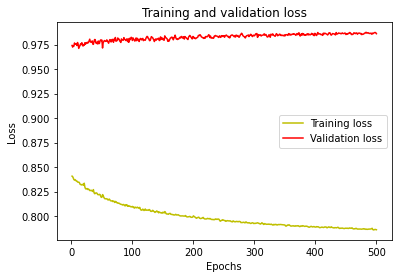

In [121]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('500trainloss')
plt.show()
plt.close()


In [119]:
from matplotlib import pyplot as plt


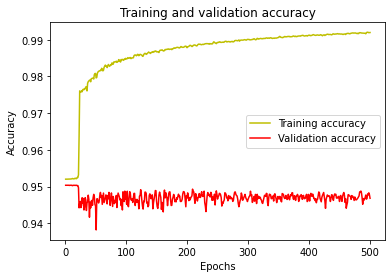

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('500trainacc')
plt.show()
plt.close()

In [123]:
modelV = model_from_json(open(modelFile).read())
model5.load_weights(os.path.join(os.path.dirname(modelFile), 'model_weights.h5'))

NameError: name 'model_from_json' is not defined

In [126]:
from keras.models import load_model


#Load model for prediction or continue training

#For continuing training....
#The following gives an error: Unknown loss function: dice_loss_plus_1focal_loss
#This is because the model does not save loss function and metrics. So to compile and 
#continue training we need to provide these as custom_objects.
#my_model = load_model('brats_3d.hdf5')

#So let us add the loss as custom object... but the following throws another error...
#Unknown metric function: iou_score
#my_model = load_model('brats_3d.hdf5', custom_objects={'dice_loss_plus_1focal_loss': total_loss})

#Now, let us add the iou_score function we used during our initial training
my_model = load_model('segmentation_3d.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

#Now all set to continue the training process. 
history2=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=1,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

258/258 [==============================] - 132s 496ms/step - loss: 0.7864 - accuracy: 0.9920 - iou_score: 0.7909 - val_loss: 0.9865 - val_accuracy: 0.9483 - val_iou_score: 0.2521


In [129]:
my_model = load_model('segmentation_3d.hdf5', 
                      compile=False)


#Verify IoU on a batch of images from the test dataset
#Using built in keras function for IoU
#Only works on TF > 2.0
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.23905161


In [130]:
#Predict on a few test images, one at a time
#Try images: 
img_num = 82

test_img = np.load("/home/passion/Documents/dockerfiles/brats_split_75-25/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("/home/passion/Documents/dockerfiles/brats_split_75-25/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))

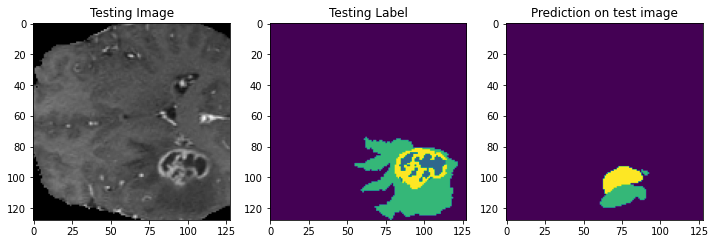

In [131]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()